<a href="https://www.kaggle.com/code/kapusharinka/network-anomaly-detection?scriptVersionId=178773804" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd

# Network Anomaly Detection
https://en.wikipedia.org/wiki/Anomaly_detection#Popular_techniques</br>
https://medium.com/@AmyGrabNGoInfo/list/imbalanced-classification-and-anomalies-detection-dc908de4382d</br>
https://youtube.com/playlist?list=PLVppujud2yJo0qnXjWVAa8h7fxbFJHtfJ&feature=shared

# Data preprocessing and overview
Dataset is taken from here: https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection. It is based on [KDD-Cup '99](https://www.kdd.org/kdd-cup/view/kdd-cup-1999/Data).

In [2]:
train = pd.read_csv('/kaggle/input/network-intrusion-detection/Train_data.csv')
# test set is not labelled, so we won't use it
# test = pd.read_csv('/kaggle/input/network-intrusion-detection/Test_data.csv') 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

## List of columns

### BASIC FEATURES OF EACH NETWORK CONNECTION VECTOR
1. Duration: Length of time duration of the connection
1. Protocol_type: Protocol used in the connection
1. Service: Destination network service used
1. Flag: Status of the connection – Normal or Error
1. Src_bytes: Number of data bytes transferred from source to destination in single connection
1. Dst_bytes: Number of data bytes transferred from destination to source in single connection
1. Land: if source and destination IP addresses and port numbers are equal then, this variable takes value 1 else 0
1. Wrong_fragment: Total number of wrong fragments in this connection
1. Urgent: Number of urgent packets in this connection. Urgent packets are packets with the urgent bit activated
### CONTENT RELATED FEATURES OF EACH NETWORK CONNECTION VECTOR
1. Hot: Number of „hot‟ indicators in the content such as: entering a system directory, creating programs and executing programs
1. Num_failed_logins: Count of failed login attempts
1. Logged_in Login Status: 1 if successfully logged in; 0 otherwise
1. Num_compromised: Number of compromised' ' conditions 
1. Root_shell: 1 if root shell is obtained; 0 otherwise 
1. Su_attempted: 1 ifsu root'' command attempted or used; 0 otherwise
1. Num_root: Number of root'' accesses or number of operations performed as a root in the connection 
1. Num_file_creations: Number of file creation operations in the connection 
1. Num_shells: Number of shell prompts 
1. Num_access_files: Number of operations on access control files 
1. Num_outbound_cmds: Number of outbound commands in an ftp session 
1. Is_hot_login: 1 if the login belongs to thehot'' list i.e., root or admin; else 0
1. Is_guest_login: 1 if the login is a guest, 0 otherwise
### TIME RELATED TRAFFIC FEATURES OF EACH NETWORK CONNECTION VECTOR
1. Count: Number of connections to the same destination host as the current connection in the past two seconds
1. Srv_count: Number of connections to the same service (port number) as the current connection in th e past two seconds
1. Serror_rate: The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in count (23)
1. Srv_serror_rate: The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in srv_count (24)
1. Rerror_rate: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in count (23)
1. Srv_rerror_rate: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in srv_count (24)
1. Same_srv_rate: The percentage of connections that were to the same service, among the connections aggregated in count (23)
1. Diff_srv_rate: The percentage of connections that were to different services, among the connections aggregated in count (23)
1. Srv_diff_host_ rate: The percentage of connections that were to different destination machines among the connections aggregated in srv_count (24)
### HOST BASED TRAFFIC FEATURES IN A NETWORK CONNECTION VECTOR
1. Dst_host_count: Number of connections having the same destination host IP address
1. Dst_host_srv_ count: Number of connections having the same port number
1. Dst_host_same srv_rate: The percentage of connections that were to the same service, among the connections aggregated in dst_host_count (32) 
1. Dst_host_diff srv_rate: The percentage of connections that were to different services, among the connections aggregated in dst_host_count (32)
1. Dst_host_same src_port_rate: The percentage of connections that were to the same source port, among the connections aggregated in dst_host_srv_c ount (33) 
1. Dst_host_srv diff_host_rate: The percentage of connections that were to different destination machines, among the connections aggregated in dst_host_srv_count (33)
1. Dst_host_serro r_rate: The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_count (32)
1. Dst_host_srv_s error_rate: The percent of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_srv_c ount (33)
1. Dst_host_rerro r_rate: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_count (32)
1. Dst_host_srv_r error_rate: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_srv_c ount (33)

In [3]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


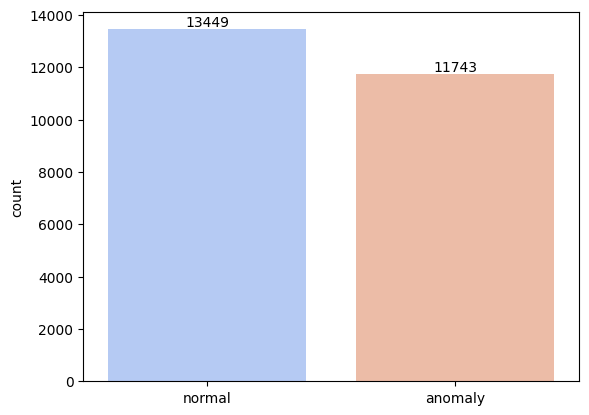

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x=train["class"], palette=("coolwarm"))
abs_values = train["class"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_xticklabels(['normal', 'anomaly'])

plt.xlabel(None)
plt.show()

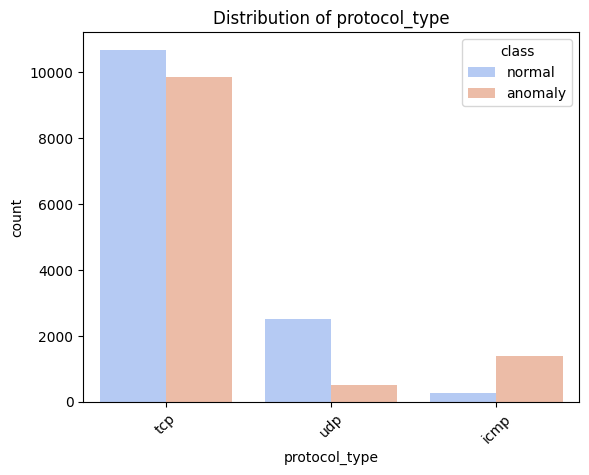

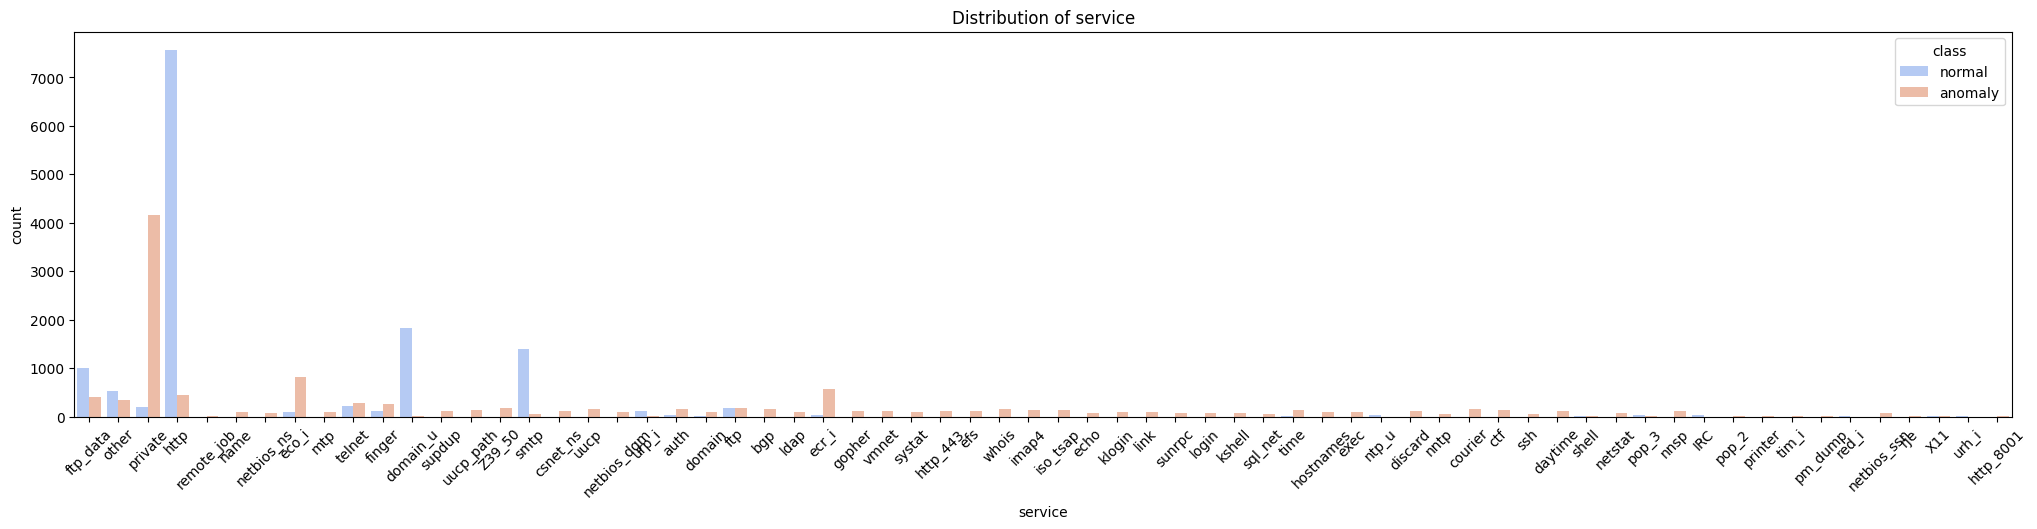

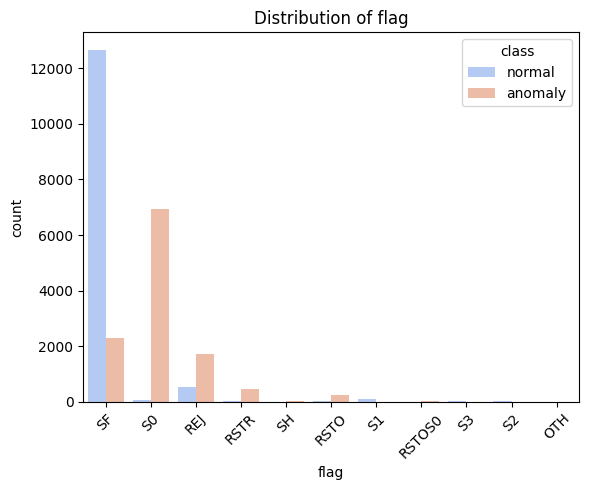

In [7]:
# categorical columns
for category in ['protocol_type', 'service', 'flag']:
    if category == 'service':
        plt.figure(figsize=(25, 5))
    sns.countplot(x=category, data=train, hue='class', palette=("coolwarm"))
    plt.title(f'Distribution of {category}')
    plt.xticks(rotation=45)
    plt.show()

In [8]:
# remove missing values (NaN)
train.dropna(inplace=True)

# duplicates
print(f"Number of duplicate rows in train set: {train.duplicated().sum()}")

Number of duplicate rows in train set: 0


## Label encoding
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [9]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

label_encoding(train)

train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


## Correlations

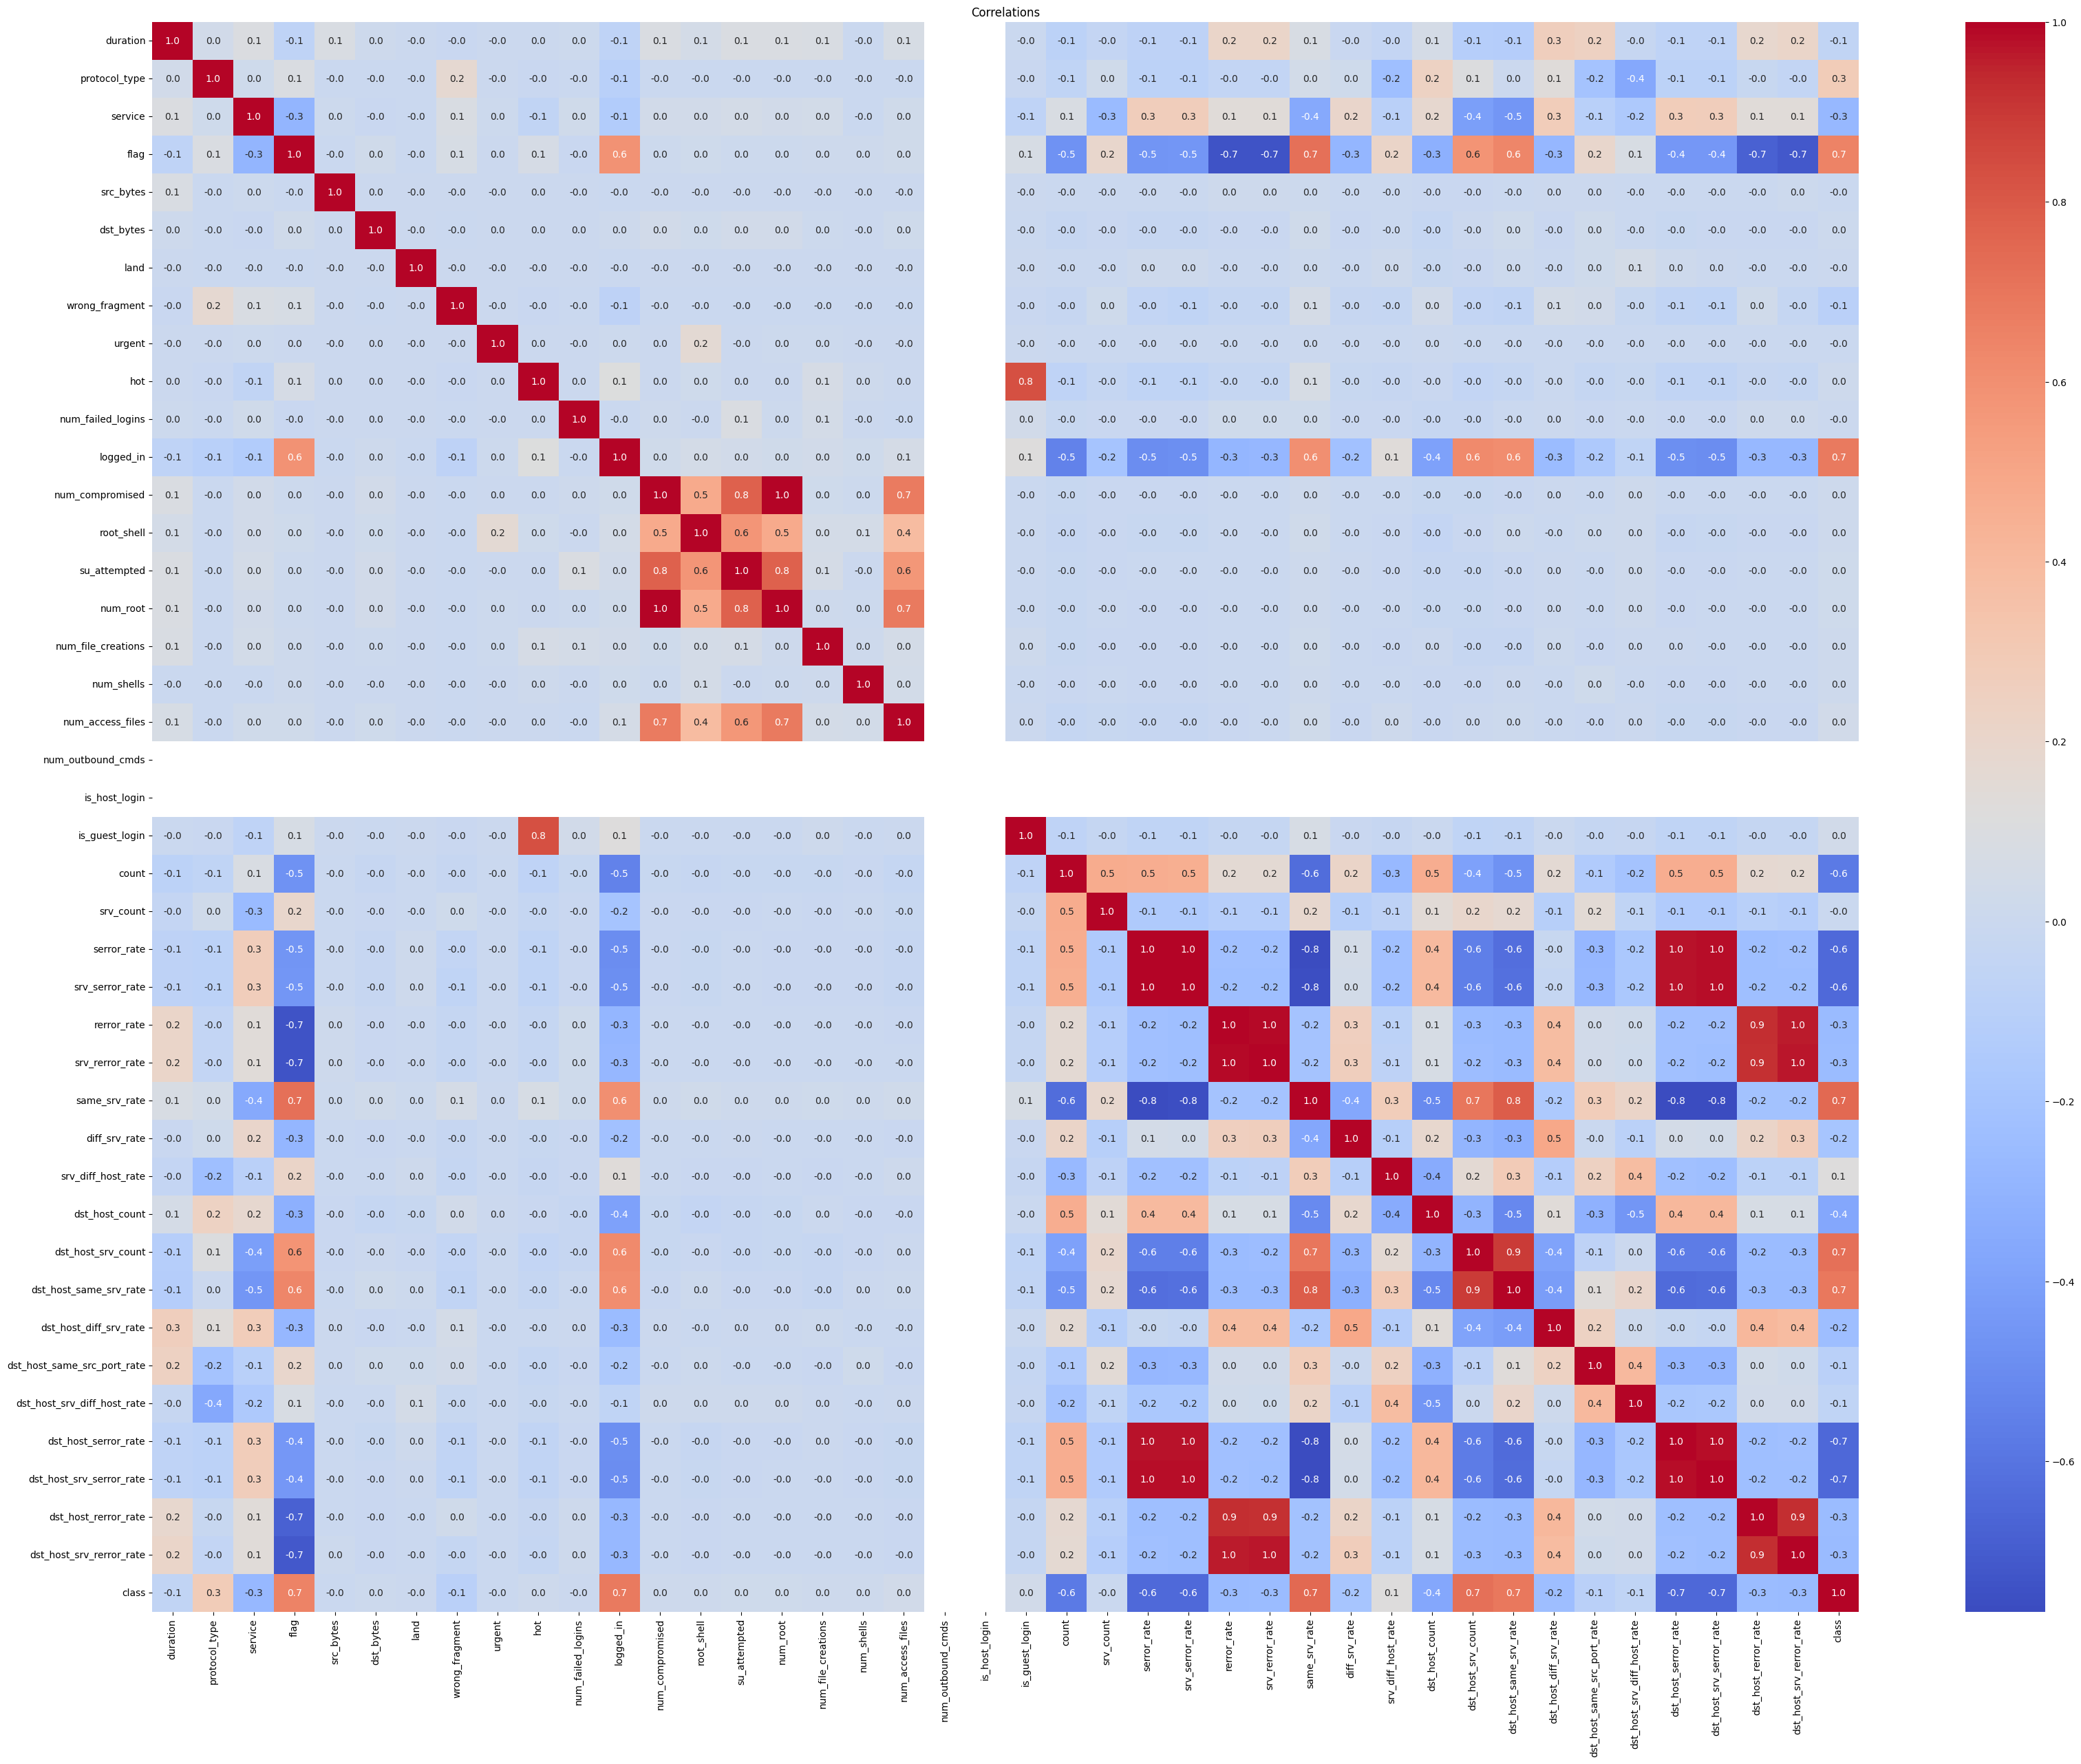

In [10]:
plt.figure(figsize=(40, 30))
sns.heatmap(train.corr(), annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlations')
plt.show()

Index(['flag', 'hot', 'num_compromised', 'su_attempted', 'num_root',
       'is_guest_login', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


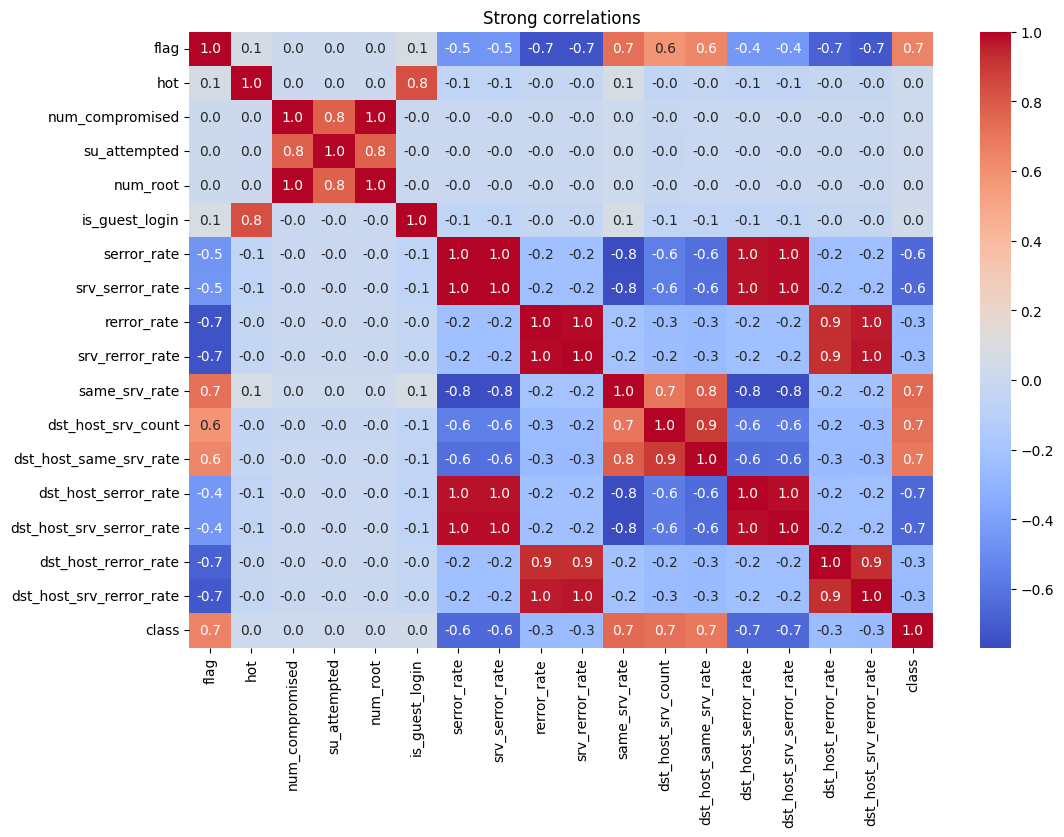

In [11]:
# only strong correlations
corr_matrix = train.corr()
threshold = 0.7

# Create a mask for values above the threshold or below the negative threshold, excluding self-correlation
mask = np.abs(corr_matrix) >= threshold
np.fill_diagonal(mask.values, False)

# Filter the columns and rows based on the mask
filtered_columns = corr_matrix.columns[mask.any()]
filtered_corr = corr_matrix.loc[filtered_columns, filtered_columns]

print(filtered_columns)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Strong correlations')
plt.show()

Let's remove the columns with correlation 1:1.

In [12]:
X = train.drop(['num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate', 'class'], axis=1)
y = train['class']

## Scale data
Let's use [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) since it's not so sensitive to outliers like StandardScaler and MinMaxScaler.

In [13]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X = scaler.fit_transform(X)

## Creating an unbalanced dataset
Our dataset is roughly balanced, and it's good for training supervised models. But in real world, the dataset is often very unbalanced. So let's create an unbalanced dataset with 5% of anomalies.

In [14]:
def shuffle_data(features, labels):
    indices = np.arange(features.shape[0])
    np.random.shuffle(indices)
    return features[indices], labels[indices]

normal = X[y == 1]
anomalies = X[y == 0]

# select random 5% of anomalies
num_anomalies = int(len(normal) * 0.05)
anomaly_indices = np.random.choice(anomalies.shape[0], num_anomalies, replace=False)
selected_anomalies = anomalies[anomaly_indices]
        
# combine
X_unbalanced = np.vstack([normal, selected_anomalies])
y_unbalanced = np.concatenate([np.full((len(normal)), 1), np.full((len(selected_anomalies)), 0)])

# shuffle
X_unbalanced, y_unbalanced = shuffle_data(X_unbalanced, y_unbalanced)

# Supervised learning

In [15]:
# scores for cross-validation

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1_score': make_scorer(f1_score, average='binary')
}

def display_results(results):
    metrics = {
        "Metric": ["Fit Time", "Score Time", "Accuracy", "Precision", "Recall", "F1 Score"],
        "Value": [results[score_name].mean() for score_name in results]
    }
    df_metrics = pd.DataFrame(metrics)
    df_metrics.set_index("Metric", inplace=True)
    return df_metrics.T

## Gaussian Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
results = cross_validate(NB, X_unbalanced, y_unbalanced, cv=5, scoring=scoring, return_train_score = False)
display_results(results) # custom function to display the results

Metric,Fit Time,Score Time,Accuracy,Precision,Recall,F1 Score
Value,0.007931,0.009308,0.822605,0.99727,0.815972,0.897491


## Logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression

# 'newton-cholesky' is the fastest
LR = LogisticRegression(max_iter=7000, solver='newton-cholesky')
results = cross_validate(LR, X_unbalanced, y_unbalanced, cv=5, scoring=scoring, return_train_score = False)
display_results(results)

Metric,Fit Time,Score Time,Accuracy,Precision,Recall,F1 Score
Value,0.075878,0.01609,0.991289,0.99268,0.998215,0.99544


## *k*-nearest neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
results = cross_validate(KNN, X_unbalanced, y_unbalanced, cv=5, scoring=scoring, return_train_score = False)
display_results(results)

Metric,Fit Time,Score Time,Accuracy,Precision,Recall,F1 Score
Value,0.002895,0.309117,0.99136,0.992681,0.99829,0.995477


## Linear support vector

LinearSVC needs all inputs to be in range [0,1], for it, it's more about classification than anomaly detection.

In [19]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler

X_unbalanced_minmax = MinMaxScaler().fit_transform(X_unbalanced)

SVC = LinearSVC()
results = cross_validate(SVC, X_unbalanced_minmax, y_unbalanced, cv=5, scoring=scoring, return_train_score = False)
display_results(results)

Metric,Fit Time,Score Time,Accuracy,Precision,Recall,F1 Score
Value,0.071809,0.016626,0.990085,0.991363,0.99829,0.994814


## Decision tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

# 'gini' the slowest
# for criterion in ['gini', 'entropy', 'log_loss']:
#     DTC = DecisionTreeClassifier(criterion = criterion)
#     results = cross_validate(DTC, X_unbalanced, y_unbalanced, cv=5, scoring=scoring, return_train_score = False)
#     display_results(results)
    
DTC = DecisionTreeClassifier(criterion = 'entropy')
results = cross_validate(DTC, X_unbalanced, y_unbalanced, cv=5, scoring=scoring, return_train_score = False)
display_results(results)

Metric,Fit Time,Score Time,Accuracy,Precision,Recall,F1 Score
Value,0.042169,0.007914,0.996317,0.998216,0.997918,0.998066


## Random forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

# 5 is the fastest
# for n_estimators in [5, 10, 15, 25, 50, 100]:
#     print(n_estimators)
#     RFC = RandomForestClassifier(n_estimators=n_estimators)
#     results = cross_validate(RFC, X_unbalanced, y_unbalanced, cv=5, scoring=scoring, return_train_score = False)
#     display_results(results)
    
RFC = RandomForestClassifier(n_estimators=5)
results = cross_validate(RFC, X_unbalanced, y_unbalanced, cv=5, scoring=scoring, return_train_score = False)
display_results(results)

Metric,Fit Time,Score Time,Accuracy,Precision,Recall,F1 Score
Value,0.052875,0.009516,0.997309,0.997405,0.999777,0.998589


## Voting classifier

Let's use voting classifier on the models with better accuracies.

In [22]:
from sklearn.ensemble import VotingClassifier

VC = VotingClassifier(estimators=[('KNN', KNN), ('LR', LR), ('DTC',DTC),('RFC',RFC)], voting='hard')
results = cross_validate(VC, X_unbalanced, y_unbalanced, cv=5, scoring=scoring, return_train_score = False)
display_results(results)

Metric,Fit Time,Score Time,Accuracy,Precision,Recall,F1 Score
Value,0.226559,0.37213,0.996742,0.997624,0.998959,0.998291


# Unsupervised learning

We can't use cross_validate function for unsupervised algorithms, so let's create 5 different sets manually. For One-class SVM, Local Outlier Factor, K-Means and Gaussian Mixture model, our train sets will consist only from normal data. For Isolation Forest, we will create separate train models with anomalies.

In [23]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

X_trains, X_tests, y_trains, y_tests = [], [], [], []

for train_index, test_index in kf.split(X_unbalanced):
    X_trains.append(X_unbalanced[train_index])
    X_tests.append(X_unbalanced[test_index])
    y_trains.append(y_unbalanced[train_index])
    y_tests.append(y_unbalanced[test_index])
    
# For algorithms (except Isolation Forest) remove anomalies from train sets
X_trains_normal = []

for X_train, y_train in zip(X_trains, y_trains):
    X_trains_normal.append(X_train[y_train == 1]) 

In [24]:
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score
from scipy.spatial.distance import cdist
import time

def gaussian_mixture_model_predictions(model, X_test):
    scores = model.score_samples(X_test)
    return np.array([0 if score < np.percentile(scores, 5) else 1 for score in scores]) 

def kmeans_predictions(model, X_test):
    labels = model.predict(X_test)
    centroids = model.cluster_centers_
    distances = cdist(X_test, centroids, 'euclidean')
    min_distances = distances[np.arange(len(distances)), labels]
    return np.array([0 if d > np.percentile(min_distances, 5) else 1 for d in min_distances])

def train_test_model(model, novelty=True, gaussian_mixture_model=False, kmeans=False):
    fit_time_total, accuracy_total, precision_total, recall_total, f1score_total = 0, 0, 0, 0, 0
    pred = []

    for X_train, X_test, y_test in zip(
        X_trains_normal if novelty else X_trains, 
        X_tests, 
        y_tests if novelty else y_trains):
        
        if novelty: 
            start_time = time.time()
            model.fit(X_train)
            fit_time_total += time.time() - start_time

            if gaussian_mixture_model:
                pred = gaussian_mixture_model_predictions(model, X_test) 
            elif kmeans:
                pred = kmeans_predictions(model, X_test)
            else:
                pred = np.array([0 if p == -1 else 1 for p in model.predict(X_test)])
        
        else:
            start_time = time.time()
            pred = np.array([0 if p == -1 else 1 for p in model.fit_predict(X_train)])
            fit_time_total += time.time() - start_time

        accuracy_total += balanced_accuracy_score(y_test, pred)
        precision_total += precision_score(y_test, pred)
        recall_total += recall_score(y_test, pred)
        f1score_total += f1_score(y_test, pred)

    metrics = {
        "Metric": ["Fit Time", "Accuracy", "Precision", "Recall", "F1 Score"],
        "Value": [fit_time_total / len(X_trains_normal), accuracy_total / len(X_trains_normal), precision_total / len(X_trains_normal), 
                  recall_total / len(X_trains_normal), f1score_total / len(X_trains_normal)]
    }
    df_metrics = pd.DataFrame(metrics)
    df_metrics.set_index("Metric", inplace=True)
    return df_metrics.T

## One-class SVM

In [25]:
from sklearn.svm import OneClassSVM

# 'linear' gives the best recall
# for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
#     print(kernel)
#     model = OneClassSVM(kernel=kernel, nu=0.2)
#     train_test_model(model)

model = OneClassSVM(kernel='linear', nu=0.2)
train_test_model(model)

Metric,Fit Time,Accuracy,Precision,Recall,F1 Score
Value,1.518952,0.766559,0.98363,0.799691,0.88217


## Local Outlier Factor
LOF can be used for outlier or novelty detection.

In [26]:
# novelty detection
from sklearn.neighbors import LocalOutlierFactor

# 15 gives the best recall
# for n_neighbors in [3, 5, 10, 15, 20, 25]:
#     print(n_neighbors)
#     model = LocalOutlierFactor(n_neighbors=n_neighbors, novelty=True)
#     train_test_model(model)

model = LocalOutlierFactor(n_neighbors=5, novelty=True)
train_test_model(model)

Metric,Fit Time,Accuracy,Precision,Recall,F1 Score
Value,0.362071,0.688257,0.971064,0.923624,0.946749


In [27]:
# outlier detection
model = LocalOutlierFactor(n_neighbors=5) # same as for novelty detection
train_test_model(model, novelty=False)

Metric,Fit Time,Accuracy,Precision,Recall,F1 Score
Value,0.403954,0.520222,0.954389,0.926891,0.940437


## Isolation Forest

In [28]:
from sklearn.ensemble import IsolationForest

# all are good, but with 100 precision and recall are slightly better
# for n_estimators in [5, 10, 15, 25, 50, 100]:
#     print(n_estimators)
#     model = IsolationForest(contamination=0.05, n_estimators=n_estimators)
#     train_test_model(model, novelty=False)

model = IsolationForest(contamination=0.05, n_estimators=100)
train_test_model(model, novelty=False)

Metric,Fit Time,Accuracy,Precision,Recall,F1 Score
Value,0.952766,0.659317,0.967574,0.965144,0.966358


## Gaussian Mixture Model
https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4

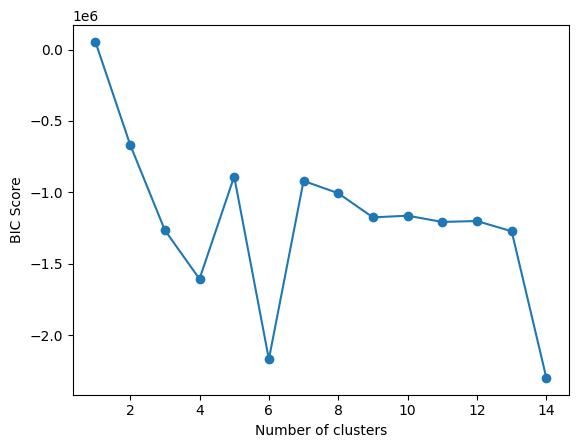

In [29]:
# elbow method is not very helpful, but we can try 4, 6 or 14 clusters

from sklearn.mixture import GaussianMixture

n_clusters = range(1, 15)
bics = []
for k in n_clusters:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(normal)
    bics.append(gmm.bic(normal))

plt.plot(n_clusters, bics, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('BIC Score')
plt.show()

In [30]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=4, random_state=42) # random_state is set to produce same results across multiple calls
train_test_model(model, gaussian_mixture_model=True)

Metric,Fit Time,Accuracy,Precision,Recall,F1 Score
Value,2.187893,0.833482,0.984043,0.981267,0.982648


## K-Means

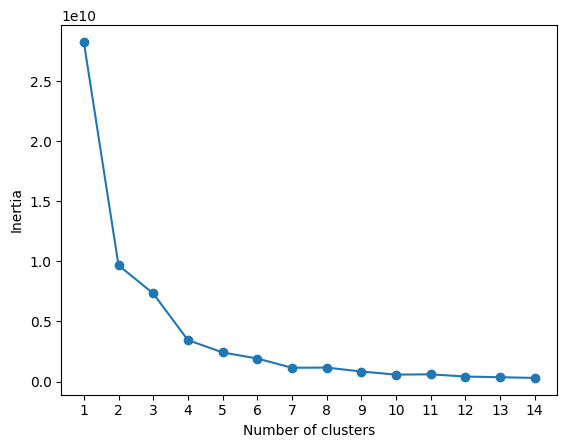

In [31]:
# finding the optimal number of clusters using an elbow method
from sklearn.cluster import KMeans

n_clusters = range(1, 15)
inertias = []
for k in n_clusters:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(normal)
    inertias.append(kmeans.inertia_)

plt.plot(n_clusters, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(n_clusters)
plt.show()

In [32]:
model = KMeans(n_clusters=1, n_init='auto')
train_test_model(model, kmeans=True)

Metric,Fit Time,Accuracy,Precision,Recall,F1 Score
Value,0.071585,0.524883,0.997183,0.052644,0.100008


# Deep learning

## Autoencoder
https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*MMRDQ4g3QvQNc7iJsKM9pg@2x.png" width="800"/>
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png" width="800"/>

In [36]:
# an attempt to use autoencoders
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Sequential, Model

# Input layer
input = Input(shape=(35,))

# Encoder layers
encoder = Sequential([
  Dense(16, activation='relu'),
  Dense(8, activation='relu'),
  Dense(4, activation='relu')])(input)

# Decoder layers
decoder = Sequential([
      Dense(8, activation='relu'),
      Dense(16, activation='relu'),
      Dense(35, activation="sigmoid")])(encoder)

# Create the autoencoder
autoencoder = Model(inputs=input, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mae')
history = autoencoder.fit(normal, normal, 
                          epochs=5, 
                          batch_size=256,
                          validation_split=0.2,
                          shuffle=True)

# Predict on the test set
X_test = X_tests[0]
y_test = y_tests[0]
reconstructed_test = autoencoder.predict(X_test)

# Calculate the mean squared error of the reconstruction
mse_test = np.mean(np.power(X_test - reconstructed_test, 2), axis=1)

# Determine a threshold for classifying a point as an anomaly
threshold = np.percentile(mse_test, 95)  # Set threshold at the 95th percentile

# Anything above the threshold is considered an anomaly
pred = (mse_test > threshold).astype(int)

metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Value": [balanced_accuracy_score(y_test, pred), precision_score(y_test, pred), recall_score(y_test, pred), f1_score(y_test, pred)]
}
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Metric", inplace=True)
df_metrics.T

Epoch 1/5
43/43 [==============================] - 1s 7ms/step - loss: 7.2799 - val_loss: 6.0808
Epoch 2/5
43/43 [==============================] - 0s 3ms/step - loss: 7.1445 - val_loss: 5.8818
Epoch 3/5
43/43 [==============================] - 0s 3ms/step - loss: 6.9795 - val_loss: 5.8010
Epoch 4/5
43/43 [==============================] - 0s 3ms/step - loss: 6.9507 - val_loss: 5.7936
Epoch 5/5
89/89 [==============================] - 0s 1ms/step


Metric,Accuracy,Precision,Recall,F1 Score
Value,0.526414,1.0,0.052827,0.100353
